## <center>Implementing Simple Text Summarizer in Python using spaCy</center>
<center> <b>A step-by-step guide to summarizing text using NLP</b> </center> 

#### <center>September 2022 </center>

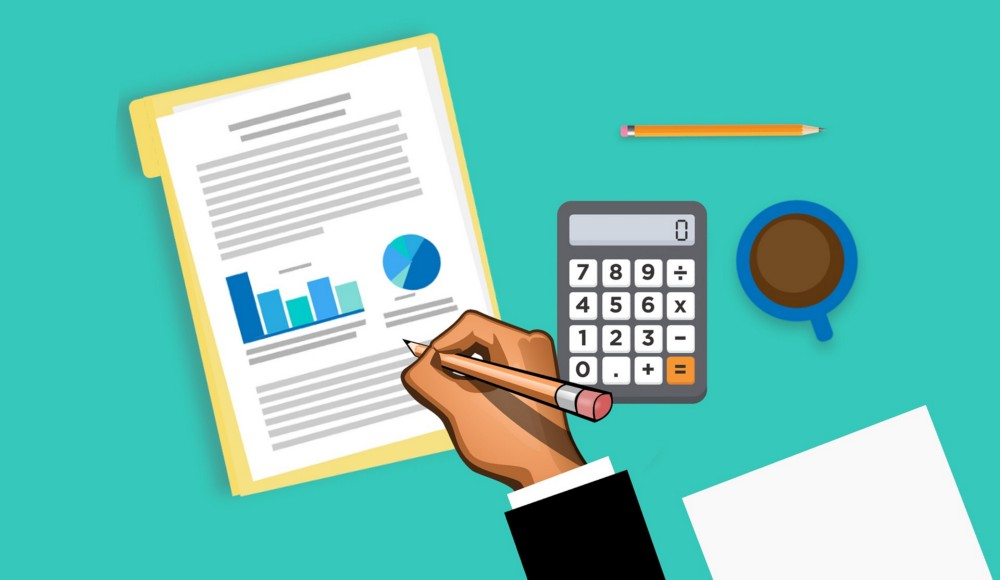
<center>source : Image by mohamed Hassan from Pixabay</center>

## Overview

Daily, we read a lot of articles, most of which are textual and consume a lot of our time. It is possible that there will be an article with 10,000 words and maybe the important points will be just 20 or 30 and that will be sufficient for us to grasp those whole article.

So the idea behind this automatic text summarization is to find all those useful information out of huge amount of text through natural language processing (NLP).

## What is the purpose of Text Summarization in NLP?

According to Mehdi Allahyari et al., Text Summarization Techniques: A Brief Survey, 2017

<code><b>"Automatic text summarization is the task of producing a concise and fluent summary while preserving key information content and overall meaning"</b></code>

In general, two different approaches are used for text summarization:

#### 1. Extractive Summarization

Only the most important sentences or phrases are extracted from the original text.

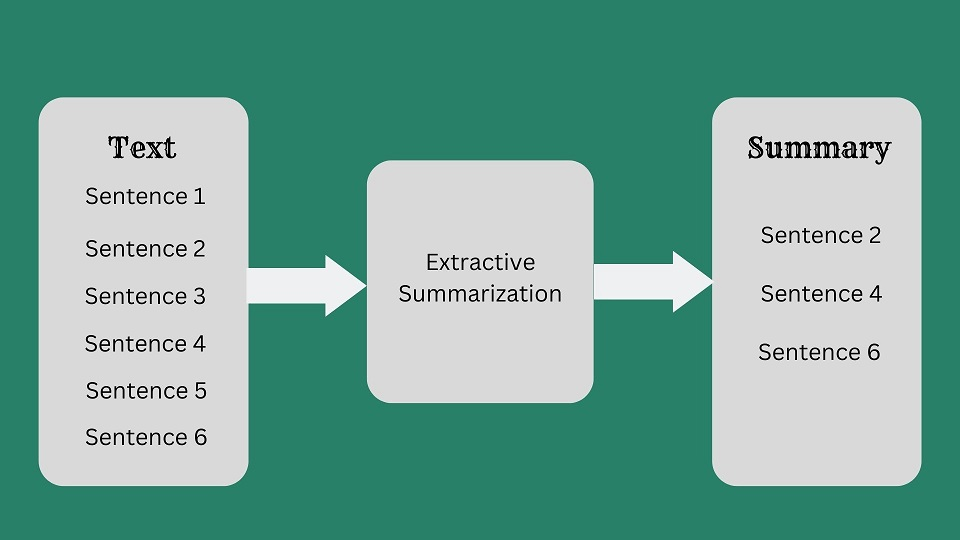

#### 2. Abstractive Summarization

It is the opposite of extractive summarization, in which an exact sentence is used to generate new sentences summary by identifying the most important information of the original group of sentences. It is possible that these new sentences summary do not appear in the original sentences.

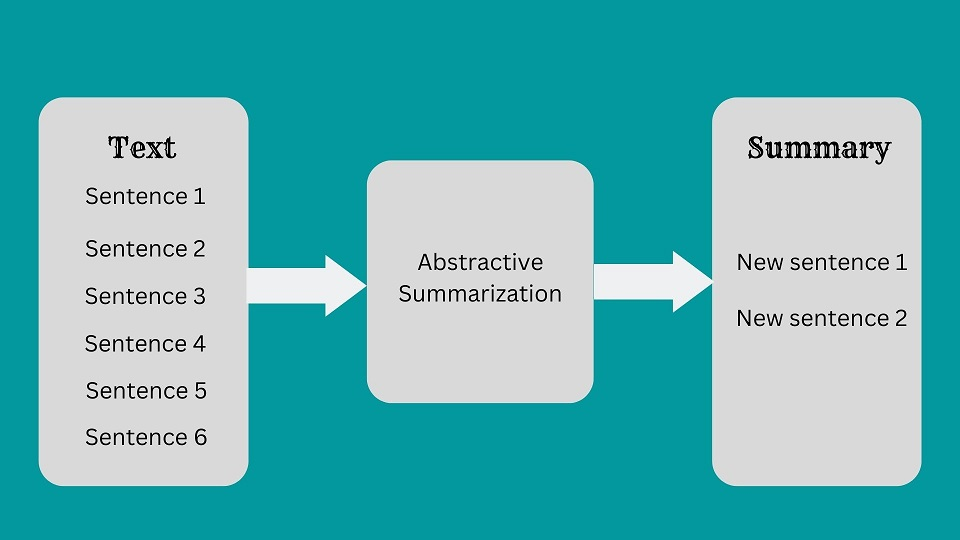

So, in this article, we will try to learn very simple approach <code><b>Extractive Summarization</b></code>.

## What is spaCy?

<code><b>spaCy</b></code> is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython (Source : wikipedia).

We will follow the simple steps for Text Summarization:

## <span style='color:rgb(205, 0, 153)'>So, let's get started</span> 🧑👈🙏💪

### 1) Install Prerequisites

In [ ]:
################################################################################################################################
# Installing spaCy library and downloading small model (uncomment if you want to install)
################################################################################################################################

!pip install -U spacy
!python -m spacy download en_core_web_sm

### 2) Importing required libraries

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

### 3) Input text

In [109]:
################################################################################################################################
# Input (Text taken from an article titled Microsoft Launches Intelligent Cloud Hub To Upskill Students In AI & Cloud Technologies)
################################################################################################################################
text = """"In an attempt to build an AI-ready workforce, Microsoft announced Intelligent Cloud Hub which has been lanched to empower the next generation of students with AI-ready skills. Envisioned as a three-year collaborative program, Intelligent Cloud Hub will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. As part of the program, the Redmond giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses. The company will provide AI development tools and Azure AI services such as Microsoft Cognitive Services, Bot Services and Azure Machine Learning.According to Manish Prakash, Country General Manager-PS, Health and Education, Microsoft India, said, With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset. This will require more collaborations and training and working with AI. That’s why it has become more critical than ever for educational institutions to integrate new cloud and AI technologies. The program is an attempt to ramp up the institutional set-up and build capabilities among the educators to educate the workforce of tomorrow. The program aims to build up the cognitive skills and in-depth understanding of developing intelligent cloud connected solutions for applications across industry. Earlier in April this year, the company announced Microsoft Professional Program In AI as a learning track open to the public. The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well. This program also included developer-focused AI school that provided a bunch of assets to help build AI skills."""

print("Length of original text:",len(text))

### 4) Defining the textSummarizer function

In [110]:
################################################################################################################################
# Defining the textSummarizer function
################################################################################################################################
def textSummarizer(text, percentage):
    
    # load the model into spaCy
    nlp = spacy.load('en_core_web_sm')
    
    # pass the text into the nlp function
    doc= nlp(text)
    
    ## The score of each word is kept in a frequency table
    tokens=[token.text for token in doc]
    freq_of_word=dict()
    
    # Text cleaning and vectorization 
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in freq_of_word.keys():
                    freq_of_word[word.text] = 1
                else:
                    freq_of_word[word.text] += 1
                    
    # Maximum frequency of word
    max_freq=max(freq_of_word.values())
    
    # Normalization of word frequency
    for word in freq_of_word.keys():
        freq_of_word[word]=freq_of_word[word]/max_freq
        
    # In this part, each sentence is weighed based on how often it contains the token.
    sent_tokens= [sent for sent in doc.sents]
    sent_scores = dict()
    for sent in sent_tokens:
        for word in sent:
            if word.text.lower() in freq_of_word.keys():
                if sent not in sent_scores.keys():                            
                    sent_scores[sent]=freq_of_word[word.text.lower()]
                else:
                    sent_scores[sent]+=freq_of_word[word.text.lower()]
    
    
    len_tokens=int(len(sent_tokens)*percentage)
    
    # Summary for the sentences with maximum score. Here, each sentence in the list is of spacy.span type
    summary = nlargest(n = len_tokens, iterable = sent_scores,key=sent_scores.get)
    
    # Prepare for final summary
    final_summary=[word.text for word in summary]
    
    #convert to a string
    summary=" ".join(final_summary)
    
    # Return final summary
    return summary

### 5) Calling the textSummarizer with two arguments (input, percentage of summary)

In [111]:
################################################################################################################################
# Calling the textSummarizer with two arguments (input, percentage of summary)
################################################################################################################################
final_summary = textSummarizer(text, 0.2)

### 6) Getting the summary

In [114]:
################################################################################################################################
# Output
################################################################################################################################
print("#"*50)
print("Summary of the text")
print("Length of summarized text:",len(final_summary))
print("#"*50)
print()
print(final_summary)

##################################################
Summary of the text
Length of summarized text: 468
##################################################

Envisioned as a three-year collaborative program, Intelligent Cloud Hub will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well.


### Conclusion

You can dramatically increase your productivity by minimizing the time you spend reading. Natural language processing can streamline your reading experience whether you're reading textbooks, news, reports, or academic journals.

<span style='color:rgb(205, 0, 153)'>__Many thanks for reading my kernal!__🙏

<span style='color:rgb(205, 0, 153)'>__Please leave a comment if you have any suggestions for improving the analysis!__🏋🥇

<span style='color:rgb(0,204,0)'>__If you liked 😊 my kernel, give 👍 UPVOTE!__

<span style='color:rgb(205, 0, 153)'>__If you have a moment, I encourage you to see my other [kernels](https://www.kaggle.com/itsmohammadshahid/code?scroll=true).__